In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("keyword_count").getOrCreate()

In [2]:
df = spark.read.csv("mock_data_unique.csv", header=True, inferSchema=True)
df.head(5)

[Row(id='<built-in function id>', question='What is Virtual Reality?', answer='Cellular senescence is a process involving Designing efficient transportation systems.', keywords='Guglielmo Marconi, Virtual Reality, San Antonio', updated_time=datetime.datetime(2023, 11, 30, 2, 51, 57), topic='Virtual reality'),
 Row(id='<built-in function id>', question='How does Oxygen transport work?', answer='The capital of Pakistan is Charlotte.', keywords='Pakistan, Cybersecurity, Galileo Galilei', updated_time=datetime.datetime(2024, 5, 6, 2, 51, 57), topic='Cultural diversity'),
 Row(id='<built-in function id>', question='How does Oxygen transport work?', answer="Leo Tolstoy wrote 'One Hundred Years of Solitude'.", keywords='Miami, Max Planck, Leo Tolstoy', updated_time=datetime.datetime(2024, 5, 11, 2, 51, 57), topic='Sustainable agriculture'),
 Row(id='<built-in function id>', question="Who wrote 'Invisible Man'?", answer='Smart Cities is a technology that involves Building artificial organs for

In [3]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- question: string (nullable = true)
 |-- answer: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- updated_time: timestamp (nullable = true)
 |-- topic: string (nullable = true)



In [4]:
# count keywords
from pyspark.sql.functions import split, explode, col
from pyspark.sql.functions import count
df = df.withColumn("keywords", split(col("keywords"), ", "))
df = df.withColumn("keyword", explode(col("keywords")))
df.groupBy("keyword").agg(count("keyword").alias("count")).show()

+--------------------+-----+
|             keyword|count|
+--------------------+-----+
|     Virtual Reality| 8813|
|     Galileo Galilei| 8860|
|  Internet of Things| 8892|
|              Russia| 8477|
|         Bram Stoker| 8534|
|              Drones| 8673|
|             Phoenix| 8790|
|    Circadian rhythm| 8762|
|          Exocytosis| 8806|
|               Omaha| 9015|
|Precision Agricul...| 8823|
|              Sweden| 8524|
|       Cybersecurity| 8700|
|   Geraldine Seydoux| 8708|
|       Ralph Ellison| 8573|
|   Quantum Computing|17161|
|  Virtual Assistants| 8629|
|       Douglas Adams| 8664|
|         Philippines| 8473|
|Johann Wolfgang v...| 8737|
+--------------------+-----+
only showing top 20 rows



In [5]:
# plot number of keywords
import matplotlib.pyplot as plt
import pandas as pd
df_kw_count = df.groupBy("keyword").agg(count("keyword").alias("count"))
df_kw_count = df_kw_count.toPandas()
df_kw_count = df_kw_count.sort_values("count", ascending=False)

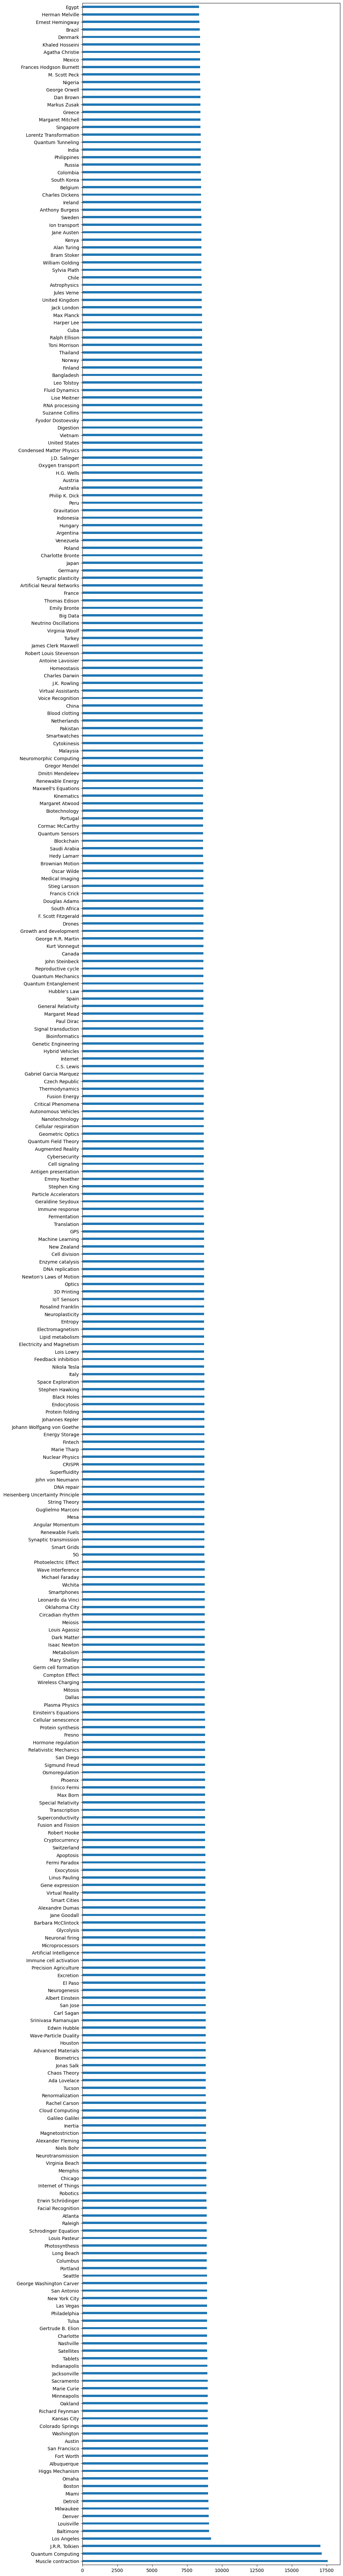

In [6]:
plt.figure(figsize=(10, 100))
plt.barh(df_kw_count["keyword"], df_kw_count["count"], height=0.3)

# Set y-axis limits
plt.ylim(-0.5, len(df_kw_count["keyword"]) - 0.5)

plt.show()